In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\HARSHIT JAIN\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv(r"C:\Users\HARSHIT JAIN\Desktop\data science projects\visit_and_tour_packages_project\datasets\feature-engineering-tour-package.csv")

In [3]:
df.head(10)

,package_name,category_of_package,cities_to_be_visit,count_of_cities,categories_by_days,no_of_nights,no_of_days,categories_by_price,accommodation_facility,price,tokenized_cities_to_be_visit,tokenized_package_name
0,amazing amaravathi,holiday_package,amaravathi,1,short trip,2,3,budget,low-cost apartment,8000.0,['amaravathi'],"['Amazing', 'Amaravathi']"
1,alluring amaravathi and vijayawada,holiday_package,"amaravathi , vijaywada",2,medium trip,3,4,budget,budget hotel,10000.0,"['amaravathi', 'vijaywada']","['Alluring', 'Amaravathi', 'and', 'Vijayawada']"
2,"awesome amaravathi, vijaywada & kakinada",holiday_package,"amaravathi , vijaywada , kakinada",3,medium trip,4,5,budget,budget hotel,12499.0,"['amaravathi', 'vijaywada', 'kakinada']","['Awesome', 'Amaravathi', 'Vijaywada', 'Kakina..."
3,delights of andhra pradesh including amaravathi,holiday_package,"tirupati , nellore , amaravathi , vijaywada...",6,medium trip,6,7,standard,3-star hotel,20000.0,"['tirupati', 'nellore', 'amaravathi', 'vijaywa...","['Delights', 'of', 'Andhra', 'Pradesh', 'inclu..."
4,gems of andhra pradesh including amaravathi an...,offbeat_package,"tirupati , nellore , amaravathi , vijaywada...",7,long trip,7,8,standard,standard hotel,23500.0,"['tirupati', 'nellore', 'amaravathi', 'vijaywa...","['Gems', 'of', 'Andhra', 'Pradesh', 'Including..."
5,pilgrimage from bangalore to tirupati,spiritual packages,"bangalore , tirupati",2,short trip,2,3,budget,low-cost apartment,7000.0,"['bangalore', 'tirupati']","['Pilgrimage', 'from', 'Bangalore', 'to', 'Tir..."
6,chennai to tirupati tour package,spiritual packages,"chennai , tirupati",2,short trip,2,3,budget,low-cost apartment,8999.0,"['chennai', 'tirupati']","['Chennai', 'to', 'Tirupati', 'Tour', 'Package']"
7,divine tirumala tirupati tour package,spiritual packages,"chennai , tirupati",2,short trip,1,2,budget,low-cost apartment,4800.0,"['chennai', 'tirupati']","['Divine', 'Tirumala', 'Tirupati', 'Tour', 'Pa..."
8,bangalore to tirupati tour package,spiritual packages,"bangalore , tirupati",2,short trip,1,2,budget,low-cost apartment,6500.0,"['bangalore', 'tirupati']","['Bangalore', 'to', 'Tirupati', 'Tour', 'Packa..."
9,tamil nadu temple tour package,cultural_package,"tiruchi , madurai , kanyakumari , ramesw...",10,extended trip,15,16,luxury,luxury guesthouse/resort,55500.0,"['tiruchi', 'madurai', 'kanyakumari', 'rameswa...","['Tamil', 'Nadu', 'Temple', 'Tour', 'Package']"


In [4]:
df.duplicated().sum()

0

In [5]:
df.shape

(2494, 12)

In [6]:
df.columns

Index(['package_name', 'category_of_package', 'cities_to_be_visit',
       'count_of_cities', 'categories_by_days', 'no_of_nights', 'no_of_days',
       'categories_by_price', 'accommodation_facility', 'price',
       'tokenized_cities_to_be_visit', 'tokenized_package_name'],
      dtype='object')

# outliers on the basis of price column

C:\Users\HARSHIT JAIN\AppData\Local\Temp\ipykernel_19052\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])
C:\Users\HARSHIT JAIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

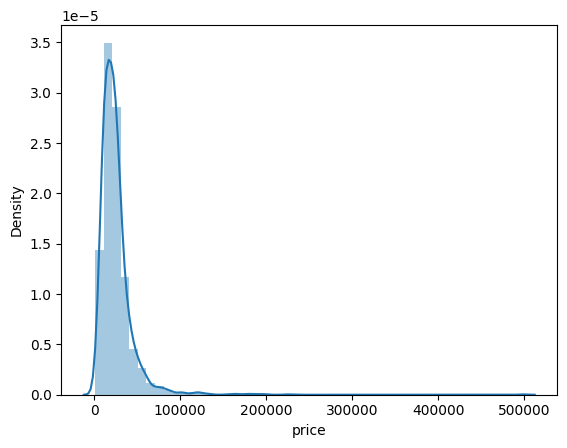

In [7]:
sns.distplot(df['price'])

<Axes: >

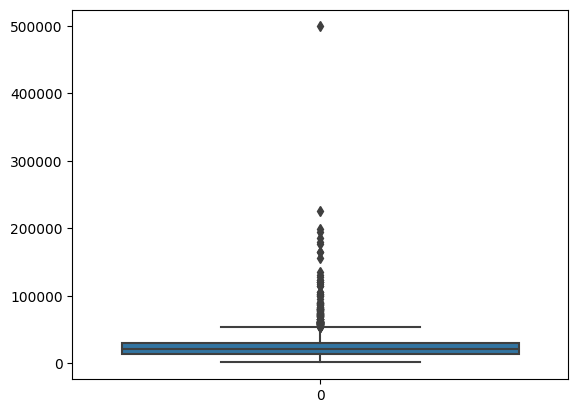

In [8]:
sns.boxplot(df['price'])

In [9]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(130,
 count       130.000000
 mean      84894.938462
 std       50141.786419
 min       54000.000000
 25%       59947.000000
 50%       69972.000000
 75%       88499.500000
 max      499000.000000
 Name: price, dtype: float64)

In [10]:
df[df['price']>100000].shape

(26, 12)

## on the basis of price col we can say that there are some genuine outliers

In [11]:
df[df['price']>100000]

,package_name,category_of_package,cities_to_be_visit,count_of_cities,categories_by_days,no_of_nights,no_of_days,categories_by_price,accommodation_facility,price,tokenized_cities_to_be_visit,tokenized_package_name
470,the ladakh tour package: the ultimate road tra...,holiday_package,"nalagarh , manali , jispa , leh , nubra...",11,extended trip,15,16,luxury,luxury guesthouse/resort,165000.0,"['nalagarh', 'manali', 'jispa', 'leh', 'nubra'...","['The', 'Ladakh', 'Tour', 'Package', 'The', 'U..."
519,cycling tour of south india,adventure_package,"goa , karwar , gokarna , baindur , kop...",22,extended trip,26,27,luxury,luxury guesthouse/resort,225000.0,"['goa', 'karwar', 'gokarna', 'baindur', 'koppa...","['Cycling', 'Tour', 'of', 'South', 'India']"
759,4 days kumarakom lake resort luxury honeymoon ...,nature_package,"kochi , kumarakom",2,medium trip,3,4,luxury,high-end luxury resort,106000.0,"['kochi', 'kumarakom']","['4', 'Days', 'Kumarakom', 'Lake', 'Resort', '..."
760,silver beach and backwater package at niraama...,beach_holiday,"kochi , kumarakom",2,medium trip,4,5,luxury,high-end luxury resort,123500.0,"['kochi', 'kumarakom']","['Silver', 'Beach', 'and', 'Backwater', 'Packa..."
764,rejuvenation package for elderly couple- kumar...,wellness_package,"kochi , kumarakom",2,medium trip,3,4,luxury,high-end luxury resort,120599.0,"['kochi', 'kumarakom']","['Rejuvenation', 'Package', 'for', 'Elderly', ..."
838,wonderful mahe island,holiday_package,"mahe island , mahe island",4,medium trip,5,6,luxury,high-end luxury resort,135000.0,"['mahe', 'island', 'mahe', 'island']","['Wonderful', 'Mahe', 'Island']"
884,"wildlife safari itinerary: delhi, bandhavgarh,...",nature_package,"delhi , bandhavgarh national park , kanha ...",11,long trip,10,11,luxury,5-star resort,176000.0,"['delhi', 'bandhavgarh', 'national', 'park', '...","['Wildlife', 'Safari', 'Itinerary', 'Delhi', '..."
1057,luxury train journey: deccan odyssey - indian ...,luxury_package,"train , mumbai , vadodara , udaipur , ...",11,long trip,7,8,luxury,5-star resort,499000.0,"['train', 'mumbai', 'vadodara', 'udaipur', 'jo...","['Luxury', 'Train', 'Journey', 'Deccan', 'Odys..."
1275,south india heritage and nature tour: chennai ...,cultural_package,"chennai , pondicherry , tanjore , chetti...",8,extended trip,15,16,luxury,luxury guesthouse/resort,199000.0,"['chennai', 'pondicherry', 'tanjore', 'chettin...","['South', 'India', 'Heritage', 'and', 'Nature'..."
1417,wildlife and adventure tour package of india ...,nature_package,"delhi , jaipur , ranthambore , agra , ...",9,long trip,10,11,luxury,5-star resort,123000.0,"['delhi', 'jaipur', 'ranthambore', 'agra', 'va...","['Wildlife', 'and', 'Adventure', 'Tour', 'Pack..."


In [12]:
df.drop(index=[2244,2239,2238,2214,2119,2003,1985,1982,1971,1934,1839,1722,1467,1446,1445,1441,1417,1275,1057,884,838,759,760,764,519,470],inplace=True)

In [13]:
df[df['price']>100000]

,package_name,category_of_package,cities_to_be_visit,count_of_cities,categories_by_days,no_of_nights,no_of_days,categories_by_price,accommodation_facility,price,tokenized_cities_to_be_visit,tokenized_package_name


C:\Users\HARSHIT JAIN\AppData\Local\Temp\ipykernel_19052\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])
C:\Users\HARSHIT JAIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

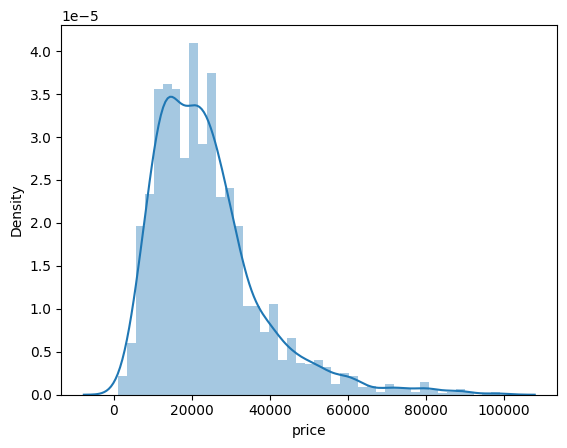

In [14]:
sns.distplot(df['price'])

<Axes: >

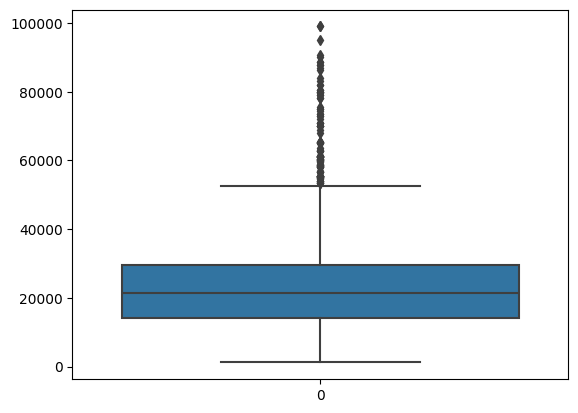

In [15]:
sns.boxplot(df['price'])

# count_of_cities

C:\Users\HARSHIT JAIN\AppData\Local\Temp\ipykernel_19052\286002847.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['count_of_cities'])
C:\Users\HARSHIT JAIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count_of_cities', ylabel='Density'>

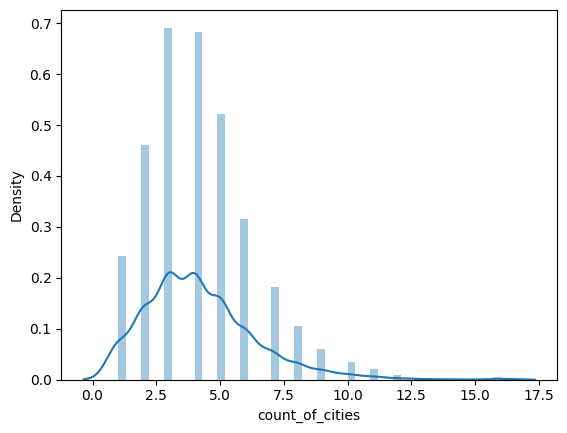

In [16]:
sns.distplot(df['count_of_cities'])

<Axes: >

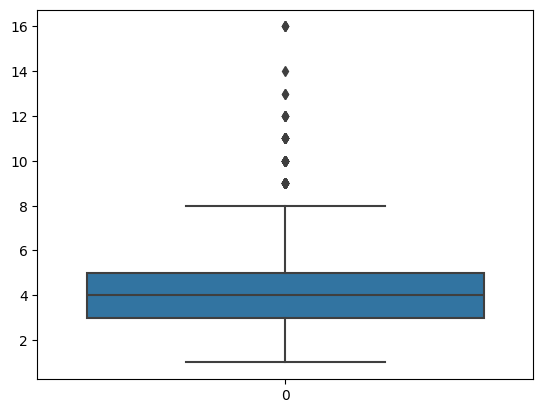

In [17]:
sns.boxplot(df['count_of_cities'])

In [18]:
Q1 = df['count_of_cities'].quantile(.25)
Q3 = df['count_of_cities'].quantile(.75)

IQR = Q3 - Q1

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

outliers_count = df[(df['count_of_cities']<lower_bound)|(df['count_of_cities']>upper_bound)]

num_outliers = outliers.shape[0]

outliers_count_city = outliers['count_of_cities'].describe()

num_outliers,outliers_count_city

(130,
 count    130.000000
 mean       7.053846
 std        3.337156
 min        1.000000
 25%        5.000000
 50%        7.000000
 75%        9.000000
 max       22.000000
 Name: count_of_cities, dtype: float64)

In [20]:
outliers_count

,package_name,category_of_package,cities_to_be_visit,count_of_cities,categories_by_days,no_of_nights,no_of_days,categories_by_price,accommodation_facility,price,tokenized_cities_to_be_visit,tokenized_package_name
9,tamil nadu temple tour package,cultural_package,"tiruchi , madurai , kanyakumari , ramesw...",10,extended trip,15,16,luxury,luxury guesthouse/resort,55500.0,"['tiruchi', 'madurai', 'kanyakumari', 'rameswa...","['Tamil', 'Nadu', 'Temple', 'Tour', 'Package']"
33,assam meghalaya arunachal pradesh tour packages,holiday_package,"guwahati , shillong , kaziranga national p...",11,long trip,12,13,luxury,5-star resort,62900.0,"['guwahati', 'shillong', 'kaziranga', 'nationa...","['Assam', 'Meghalaya', 'Arunachal', 'Pradesh',..."
43,breathtaking northeast honeymoon special: megh...,honeymoon_package,"guwahati , shillong , kaziranga national p...",11,long trip,12,13,premium,4-star hotel,44000.0,"['guwahati', 'shillong', 'kaziranga', 'nationa...","['Breathtaking', 'Northeast', 'Honeymoon', 'Sp..."
73,"manas, nameri and kaziranga national park tour",nature_package,"guwahati , manas national park , nameri na...",10,medium trip,6,7,standard,3-star hotel,28250.0,"['guwahati', 'manas', 'national', 'park', 'nam...","['Manas', 'Nameri', 'and', 'Kaziranga', 'Natio..."
75,national parks of assam tour package,nature_package,"guwahati , manas national park , nameri na...",10,medium trip,6,7,premium,5-star hotel,30900.0,"['guwahati', 'manas', 'national', 'park', 'nam...","['National', 'Parks', 'of', 'Assam', 'Tour', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2356,12-day kashmir adventure itinerary,adventure_package,"srinagar , daksum , srinagar , yusmarg ,...",9,long trip,11,12,luxury,5-star resort,71000.0,"['srinagar', 'daksum', 'srinagar', 'yusmarg', ...","['12Day', 'Kashmir', 'Adventure', 'Itinerary']"
2388,srinagar honeymoon package 8 nights 9 days wit...,honeymoon_package,"srinagar houseboat , gulmarg , pahalgam , ...",9,long trip,8,9,premium,4-star hotel,45500.0,"['srinagar', 'houseboat', 'gulmarg', 'pahalgam...","['Srinagar', 'Honeymoon', 'Package', '8', 'Nig..."
2394,ultimate 12 day trekking tour from manali,adventure_package,"delhi , manali , kaza , kibber , kowmik...",10,long trip,11,12,luxury,5-star resort,69972.0,"['delhi', 'manali', 'kaza', 'kibber', 'kowmik'...","['Ultimate', '12', 'Day', 'Trekking', 'Tour', ..."
2396,extensive spiti valley & ladakh tour with manali,holiday_package,"chandigarh , shimla , sarahan , sangla ,...",16,long trip,13,14,luxury,5-star resort,52500.0,"['chandigarh', 'shimla', 'sarahan', 'sangla', ...","['Extensive', 'Spiti', 'Valley', 'Ladakh', 'To..."


In [22]:
df[df['count_of_cities']>10]

,package_name,category_of_package,cities_to_be_visit,count_of_cities,categories_by_days,no_of_nights,no_of_days,categories_by_price,accommodation_facility,price,tokenized_cities_to_be_visit,tokenized_package_name
33,assam meghalaya arunachal pradesh tour packages,holiday_package,"guwahati , shillong , kaziranga national p...",11,long trip,12,13,luxury,5-star resort,62900.0,"['guwahati', 'shillong', 'kaziranga', 'nationa...","['Assam', 'Meghalaya', 'Arunachal', 'Pradesh',..."
43,breathtaking northeast honeymoon special: megh...,honeymoon_package,"guwahati , shillong , kaziranga national p...",11,long trip,12,13,premium,4-star hotel,44000.0,"['guwahati', 'shillong', 'kaziranga', 'nationa...","['Breathtaking', 'Northeast', 'Honeymoon', 'Sp..."
78,meghalaya arunachal assam tour packages,holiday_package,"guwahati , shillong , kaziranga national p...",11,long trip,12,13,luxury,5-star resort,62900.0,"['guwahati', 'shillong', 'kaziranga', 'nationa...","['Meghalaya', 'Arunachal', 'Assam', 'Tour', 'P..."
80,national parks of assam tour package,nature_package,"guwahati , manas national park , nameri na...",11,long trip,7,8,premium,4-star hotel,35900.0,"['guwahati', 'manas', 'national', 'park', 'nam...","['National', 'Parks', 'of', 'Assam', 'Tour', '..."
85,luxury tour packag to national parks of assam,luxury_package,"guwahati , manas national park , nameri na...",11,long trip,7,8,premium,4-star hotel,35900.0,"['guwahati', 'manas', 'national', 'park', 'nam...","['Luxury', 'Tour', 'Packag', 'to', 'National',..."
200,striking north india tour in 20 days,holiday_package,"delhi , rohtak , alsisar , jhalamand , ...",13,extended trip,18,19,luxury,luxury guesthouse/resort,99000.0,"['delhi', 'rohtak', 'alsisar', 'jhalamand', 'k...","['Striking', 'North', 'India', 'Tour', 'in', '..."
298,extensive himachal & uttarakhand tour,holiday_package,"delhi , haridwar(2n ) , chandigarh , kas...",11,long trip,12,13,luxury,5-star resort,53500.0,"['delhi', 'haridwar2n', 'chandigarh', 'kasol',...","['Extensive', 'Himachal', 'Uttarakhand', 'Tour']"
431,kinnaur spiti highland jeep safari package,adventure_package,"chandigarh , shimla , sarahan , sangla ,...",11,long trip,10,11,luxury,5-star resort,55500.0,"['chandigarh', 'shimla', 'sarahan', 'sangla', ...","['Kinnaur', 'Spiti', 'Highland', 'Jeep', 'Safa..."
436,adventurous road trip to spiti valley,holiday_package,"delhi , shimla , narkanda , chitkul , ...",13,long trip,11,12,luxury,5-star resort,61000.0,"['delhi', 'shimla', 'narkanda', 'chitkul', 'ka...","['Adventurous', 'Road', 'Trip', 'to', 'Spiti',..."
437,enthralling spiti valley and ladakh tour,holiday_package,"chandigarh , shimla , sarahan , sangla ,...",16,long trip,13,14,luxury,5-star resort,52500.0,"['chandigarh', 'shimla', 'sarahan', 'sangla', ...","['Enthralling', 'Spiti', 'Valley', 'and', 'Lad..."


In [23]:
df.drop(index=[ 33,   43,   78,   80,   85,  200,  298,  431,  436,  437,  439,  440,
        478,  979,  982, 1000, 1079, 1083, 1493, 1610, 1622, 1651, 1804, 1832,
       1835, 1887, 2221, 2396], inplace=True)

In [24]:
df[df['count_of_cities']>10]

,package_name,category_of_package,cities_to_be_visit,count_of_cities,categories_by_days,no_of_nights,no_of_days,categories_by_price,accommodation_facility,price,tokenized_cities_to_be_visit,tokenized_package_name


C:\Users\HARSHIT JAIN\AppData\Local\Temp\ipykernel_19052\286002847.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['count_of_cities'])
C:\Users\HARSHIT JAIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count_of_cities', ylabel='Density'>

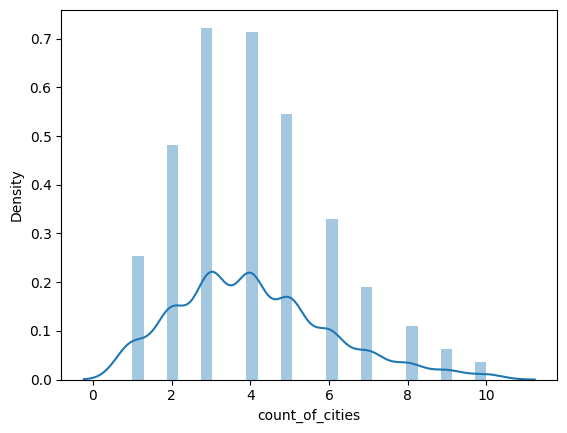

In [25]:
sns.distplot(df['count_of_cities'])

<Axes: >

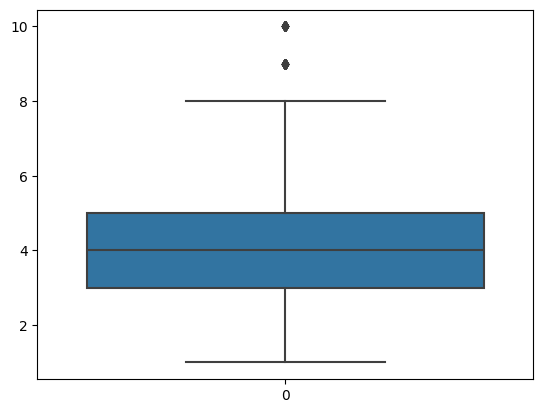

In [26]:
sns.boxplot(df['count_of_cities'])

# no_of_days

C:\Users\HARSHIT JAIN\AppData\Local\Temp\ipykernel_19052\1415293746.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['no_of_days'])
C:\Users\HARSHIT JAIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='no_of_days', ylabel='Density'>

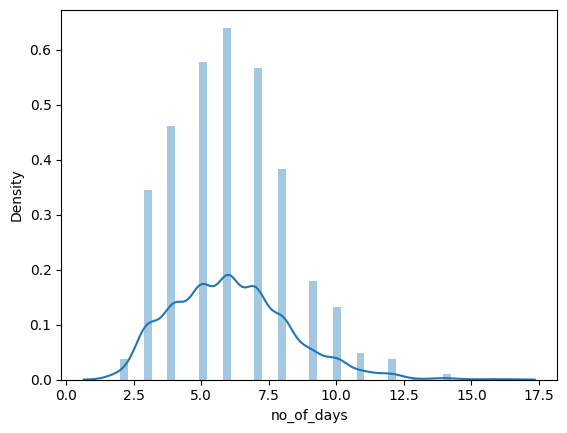

In [27]:
sns.distplot(df['no_of_days'])

<Axes: >

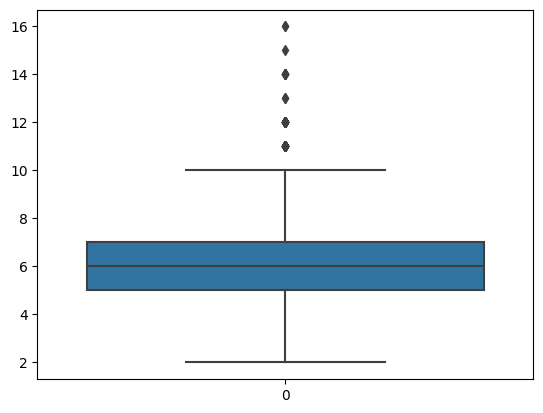

In [28]:
sns.boxplot(df['no_of_days'])

In [29]:
df['no_of_days'].describe()

count    2440.000000
mean        6.092213
std         2.138333
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        16.000000
Name: no_of_days, dtype: float64

In [30]:
df[df['no_of_days']>12]

,package_name,category_of_package,cities_to_be_visit,count_of_cities,categories_by_days,no_of_nights,no_of_days,categories_by_price,accommodation_facility,price,tokenized_cities_to_be_visit,tokenized_package_name
9,tamil nadu temple tour package,cultural_package,"tiruchi , madurai , kanyakumari , ramesw...",10,extended trip,15,16,luxury,luxury guesthouse/resort,55500.0,"['tiruchi', 'madurai', 'kanyakumari', 'rameswa...","['Tamil', 'Nadu', 'Temple', 'Tour', 'Package']"
220,shimla to jammu ultimate tour package for 12 n...,holiday_package,"manali , jispa , leh , nubra valley , ...",10,long trip,12,13,premium,4-star hotel,38000.0,"['manali', 'jispa', 'leh', 'nubra', 'valley', ...","['Shimla', 'to', 'Jammu', 'Ultimate', 'Tour', ..."
880,colours of rajasthan tour package with uttar p...,holiday_package,"delhi , jaisalmer , jodhpur , udaipur , ...",8,long trip,13,14,premium,4-star hotel,46499.0,"['delhi', 'jaisalmer', 'jodhpur', 'udaipur', '...","['Colours', 'of', 'Rajasthan', 'Tour', 'Packag..."
883,pushkar fair package with mathura & amritsar -...,holiday_package,"delhi , jaipur , pushkar , agra , khajurah...",8,long trip,13,14,premium,4-star hotel,47168.0,"['delhi', 'jaipur', 'pushkar', 'agra', 'khajur...","['Pushkar', 'Fair', 'Package', 'with', 'Mathur..."
1066,rajasthan tour with delhi & agra,holiday_package,"delhi , agra , jaipur , udaipur , jodh...",8,long trip,13,14,premium,4-star hotel,45000.0,"['delhi', 'agra', 'jaipur', 'udaipur', 'jodhpu...","['Rajasthan', 'Tour', 'with', 'Delhi', 'Agra']"
1084,delhi agra rajasthan tour package with boat ri...,nature_package,"delhi , agra , jaipur , pushkar , udai...",9,long trip,13,14,luxury,5-star resort,56700.0,"['delhi', 'agra', 'jaipur', 'pushkar', 'udaipu...","['Delhi', 'Agra', 'Rajasthan', 'Tour', 'Packag..."
1096,rajasthan tour from delhi,holiday_package,"delhi , agra , jaipur , mandawa , bika...",9,extended trip,14,15,luxury,luxury guesthouse/resort,54000.0,"['delhi', 'agra', 'jaipur', 'mandawa', 'bikane...","['Rajasthan', 'Tour', 'from', 'Delhi']"
1165,breaking the frontiers india & nepal tour package,holiday_package,"delhi , sariska , ranthambore , jaipur ,...",8,long trip,13,14,luxury,5-star resort,65000.0,"['delhi', 'sariska', 'ranthambore', 'jaipur', ...","['Breaking', 'The', 'Frontiers', 'India', 'Nep..."
1397,"rajasthan, delhi and agra tour with elephant b...",holiday_package,"delhi , agra , jaipur , udaipur , jodh...",8,long trip,13,14,premium,4-star hotel,45000.0,"['delhi', 'agra', 'jaipur', 'udaipur', 'jodhpu...","['Rajasthan', 'Delhi', 'and', 'Agra', 'Tour', ..."
1721,magnificent kashmir tour package by train,holiday_package,"kolkata , jammu , katra , vaishno devi ,...",8,long trip,13,14,luxury,5-star resort,54500.0,"['kolkata', 'jammu', 'katra', 'vaishno', 'devi...","['Magnificent', 'Kashmir', 'Tour', 'Package', ..."


In [31]:
df.drop(index=[9, 220, 880, 883, 1066, 1084, 1096, 1165, 1397, 1721, 1838, 2107], inplace=True)

In [32]:
df[df['no_of_days']>12]

,package_name,category_of_package,cities_to_be_visit,count_of_cities,categories_by_days,no_of_nights,no_of_days,categories_by_price,accommodation_facility,price,tokenized_cities_to_be_visit,tokenized_package_name


C:\Users\HARSHIT JAIN\AppData\Local\Temp\ipykernel_19052\1415293746.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['no_of_days'])
C:\Users\HARSHIT JAIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='no_of_days', ylabel='Density'>

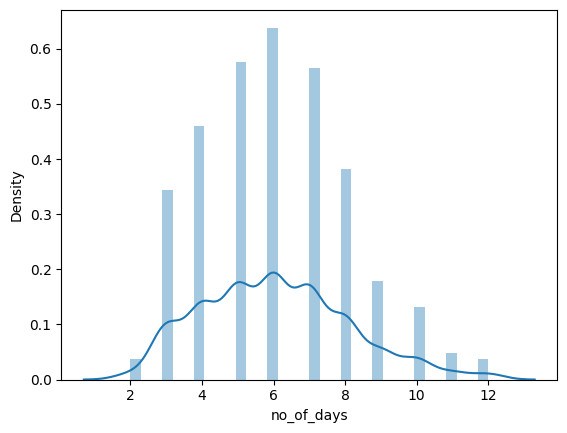

In [33]:
sns.distplot(df['no_of_days'])

<Axes: >

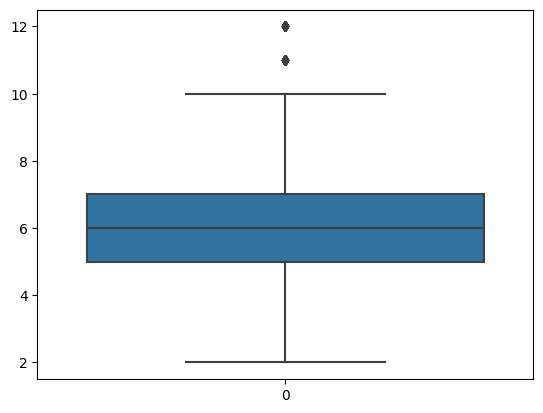

In [34]:
sns.boxplot(df['no_of_days'])

In [35]:
df.shape

(2428, 12)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2428 entries, 0 to 2493
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   package_name                  2428 non-null   object 
 1   category_of_package           2428 non-null   object 
 2   cities_to_be_visit            2428 non-null   object 
 3   count_of_cities               2428 non-null   int64  
 4   categories_by_days            2428 non-null   object 
 5   no_of_nights                  2428 non-null   int64  
 6   no_of_days                    2428 non-null   int64  
 7   categories_by_price           2428 non-null   object 
 8   accommodation_facility        2428 non-null   object 
 9   price                         2428 non-null   float64
 10  tokenized_cities_to_be_visit  2428 non-null   object 
 11  tokenized_package_name        2428 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 311.1+ KB


In [37]:
df.describe()

,count_of_cities,no_of_nights,no_of_days,price
count,2428.000000,2428.000000,2428.000000,2428.000000
mean,4.063839,5.051895,6.051895,23433.740115
std,1.928801,2.064021,2.064021,13513.997955
min,1.000000,1.000000,2.000000,1199.000000
25%,3.000000,4.000000,5.000000,14000.000000
50%,4.000000,5.000000,6.000000,21000.000000
75%,5.000000,6.000000,7.000000,29000.000000
max,10.000000,11.000000,12.000000,99000.000000


In [38]:
df.to_csv('tour-package-outlier-treated.csv',index=False)